In [1]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import fir1

In [2]:
def show_plot(x, y, title='', xlabel='', ylabel=''):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
f1 = 900
f2 = 2050
fd_ = 8000
fd__ = 4000
fd___ = 16000

In [4]:
secs = 1

In [5]:
t = np.arange(0, secs, 1/fd_)
fff = np.arange(0, fd_, fd_/len(t))

x = np.sin(2 * np.pi * f1 * t) + 0.75 * np.sin(2 * np.pi * f2 * t)

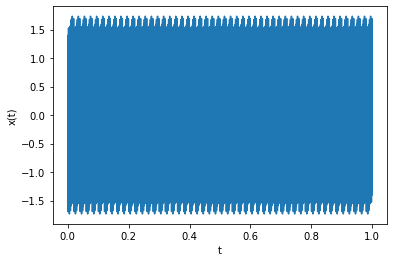

In [6]:
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

In [7]:
decimate = fd_ / fd__
decimate

2.0

In [8]:
h = scipy.signal.firwin(20, 0.5)
h

array([ 0.00188953,  0.00276977, -0.00529527, -0.00995578,  0.01742331,
        0.02881991, -0.04646496, -0.07642886,  0.14129436,  0.44594799,
        0.44594799,  0.14129436, -0.07642886, -0.04646496,  0.02881991,
        0.01742331, -0.00995578, -0.00529527,  0.00276977,  0.00188953])

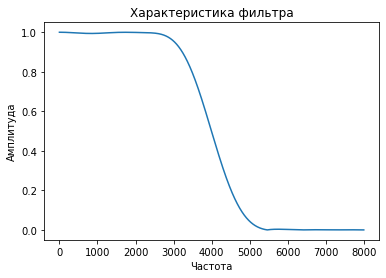

In [9]:
w,h1 = scipy.signal.freqz(h, 1, 8000)
show_plot(fff, abs(h1), 'Характеристика фильтра', 'Частота', 'Амплитуда')

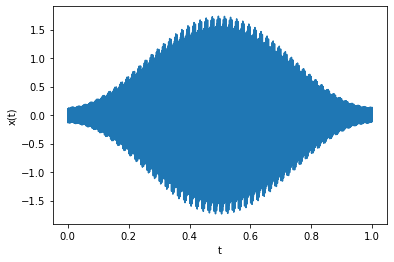

In [10]:
N = len(t)
w = scipy.signal.hamming(N)
dw = x * w

plt.plot(t, dw)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

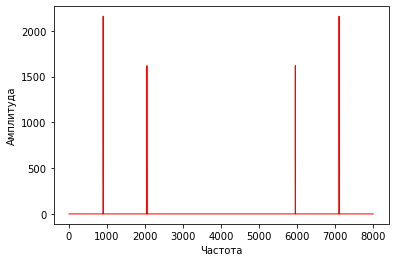

In [12]:
AmplSpec_dw = abs(np.fft.fft(dw))
plt.plot(AmplSpec_dw, 'red', linewidth=1)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

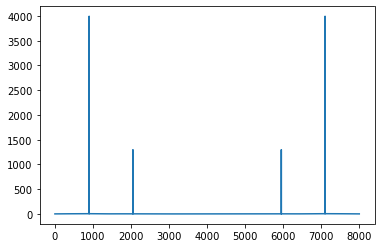

In [13]:
f1_y = scipy.signal.lfilter(h, 1, x)
f1_ampl = abs(np.fft.fft(f1_y))
plt.plot(fff, f1_ampl)
plt.show()

In [14]:
index = np.arange(1, len(x), int(decimate))
y = x[index]
y

array([ 1.39886983,  0.10783882,  0.35290553, ..., -0.35290553,
       -0.10783882, -1.39886983])

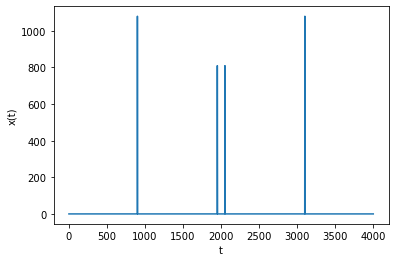

In [15]:
N = len(y)
w = scipy.signal.hamming(N)
dw = y * w

t = np.arange(0, secs, 1/fd__)
fff = np.arange(0, fd__, fd__/len(t))

plt.plot(fff, abs(np.fft.fft(dw)))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

In [16]:
secs = 0.1

t = np.arange(0, secs, 1/fd_)
fff = np.arange(0, fd_, fd_/len(t))

x = np.sin(2 * np.pi * f1 * t) + 0.75 * np.sin(2 * np.pi * f2 * t)

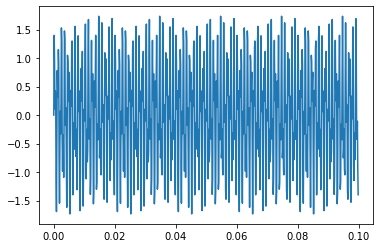

In [17]:
plt.plot(t, x)
plt.show()

In [18]:
interpolate = fd___/fd_
interpolate

2.0

In [19]:
N = len(x)
y = np.zeros(N * int(interpolate))
len(y)

1600

In [20]:
index = np.arange(0, len(y), int(interpolate))

y[index] = x

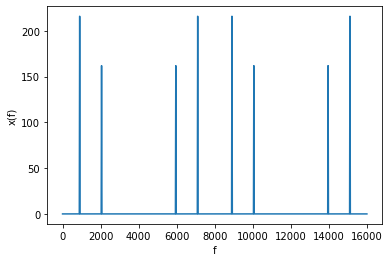

In [21]:
N = len(y)
w = scipy.signal.hamming(N)
dw = y * w

t = np.arange(0, secs, 1/fd___)
fff = np.arange(0, fd___, fd___/len(t))

plt.plot(fff, abs(np.fft.fft(dw)))
plt.xlabel('f')
plt.ylabel('x(f)')
plt.show()

In [22]:
h = scipy.signal.firwin(100, 0.5)

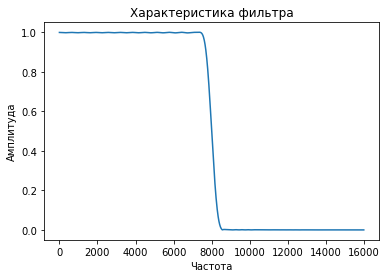

In [23]:
w,h1 = scipy.signal.freqz(h, 1, 1600)
show_plot(fff, abs(h1), 'Характеристика фильтра', 'Частота', 'Амплитуда')

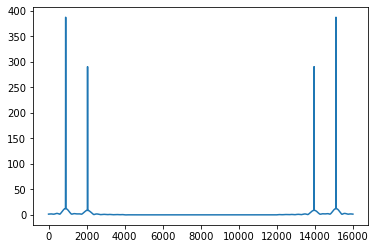

In [24]:
f1_y = scipy.signal.lfilter(h, 1, y)
f1_ampl = abs(np.fft.fft(f1_y))
plt.plot(fff, f1_ampl)
plt.show()